In [3]:
from xgboost import XGBClassifier
import joblib
import importlib
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')
plt.rcParams['figure.figsize'] = [20/2.54, 16/2.54]

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/workspaces/.gcp/waffleml_dev_key.json"

if not "model" in sys.modules:
    model = importlib.import_module("model", package=".")
    helpers = importlib.import_module("wml_helpers")
else:
    model = importlib.reload(model)
    pass

print(os.getcwd())

/workspaces/f33-gcp-mlops/examples/kaggle_store_item_demand_forecasting/models/xgb_ar


In [22]:
def download_model_instance(model="xgb_ar", phase="perf", fold_idx=0, output_file="model-perf-0.joblib"):
    if model == "xgb_ar":
        helpers.get_file_from_bucket("gs://f33-mlops/11582800304/xgb-ar--perf--0--rnd--wdal/model-training-step_-5598885282205138944/model", output_file)
    if model == "xgb_baseline":
        helpers.get_file_from_bucket("gs://f33-mlops/11582800304/xgb-baseline--perf--0--rnd--lryu/model-training-step_-6751806786811985920/model", output_file)
    return output_file


In [23]:
xgb_ar_model, _hyperparametersmm, train_stub = joblib.load(download_model_instance(phase="perf", fold_idx=0, output_file="model-perf-0.joblib"))

In [26]:
xgb_baseline_model, _hyperparameters = joblib.load(download_model_instance(model="xgb_baseline", phase="perf", fold_idx=0, output_file="model-perf-0.joblib"))

In [27]:
xgb_ar = xgb_ar_model.named_steps["xgb"]
xgb_baseline = xgb_baseline_model.named_steps["xgb"]

In [28]:
features_importance = pd.DataFrame({
    "name": xgb_ar.feature_names_in_,
    "importance": xgb_ar.feature_importances_})
features_importance.sort_values(by="importance", ascending=False, inplace=True)
features_importance

,name,importance
1,lag_sales_7,0.789970
0,day_of_week,0.058358
2,lag_sales_2,0.043958
5,month,0.028837
4,lag_sales_4,0.026689
3,lag_sales_3,0.020373
6,month_progress_pct,0.010421
8,item,0.005287
9,week_of_year,0.004736
7,store,0.004028


<AxesSubplot: ylabel='name'>

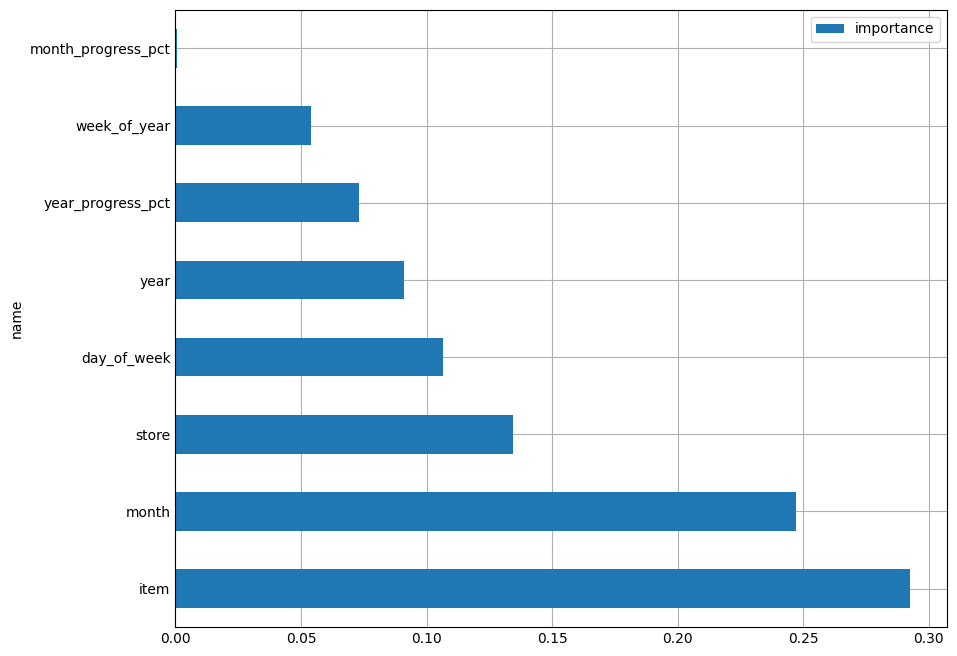

In [34]:
features_importance.plot.barh(x="name", y="importance")

In [32]:
features_importance = pd.DataFrame({
    "name": xgb_baseline.feature_names_in_,
    "importance": xgb_baseline.feature_importances_})
features_importance.sort_values(by="importance", ascending=False, inplace=True)
features_importance

,name,importance
4,item,0.292640
1,month,0.247284
3,store,0.134603
0,day_of_week,0.106727
6,year,0.091060
7,year_progress_pct,0.072909
5,week_of_year,0.054056
2,month_progress_pct,0.000721


<AxesSubplot: ylabel='name'>

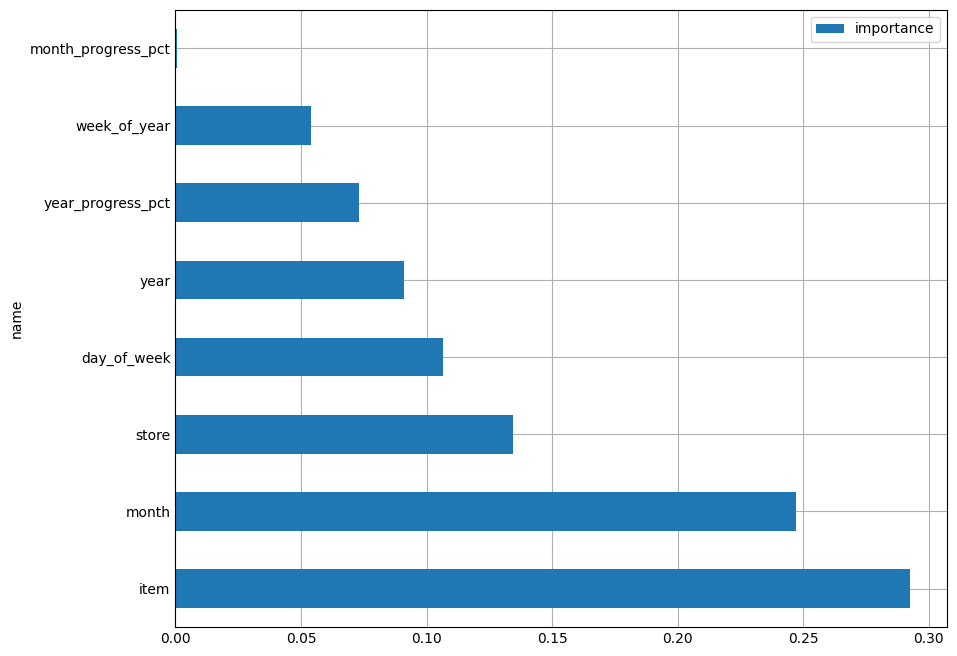

In [35]:
features_importance.plot.barh(x="name", y="importance")